# PreProcessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
plt.style.use("seaborn")

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   news_id           1996 non-null   int64  
 1   url               1996 non-null   object 
 2   publisher         1996 non-null   object 
 3   publish_date      1982 non-null   object 
 4   author            1995 non-null   object 
 5   Title             1995 non-null   object 
 6   Image             1996 non-null   object 
 7   Text              1996 non-null   object 
 8   news_guard_score  1963 non-null   float64
 9   mbfc_level        1996 non-null   object 
 10  political_bias    1801 non-null   object 
 11  country           1960 non-null   object 
 12  Label             1996 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 189.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Real and Fake News Instances')

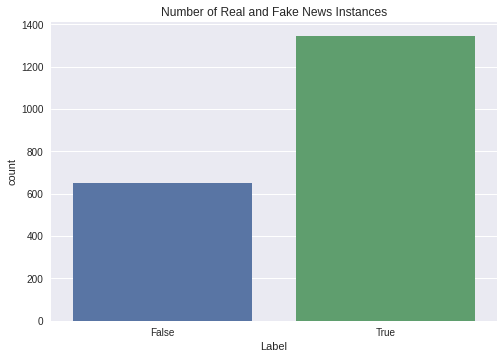

In [ ]:
#####################################################         Reading CSV        #################################################

from google.colab import drive
drive.mount('/content/drive')


PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/Ds/D4.csv'
df = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

df.info()
sns.countplot(df.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')

In [ ]:
df.head()
df['Label'].value_counts()
#df['main_img_url'].value_counts()
df.head()

,news_id,url,publisher,publish_date,author,Title,Image,Text,news_guard_score,mbfc_level,political_bias,country,Label
0,1,https://www.nytimes.com/article/what-is-corona...,The New York Times,21-01-2020,"['Knvul Sheikh', 'Roni Caryn Rabin']",The Coronavirus: What Scientists Have Learned ...,https://static01.nyt.com/images/2020/03/12/sci...,\nA novel respiratory virus that originated in...,100.0,High,Left,USA,True
1,2,https://www.npr.org/2020/01/22/798392172/chine...,National Public Radio (NPR),22-01-2020,['Emily Feng'],Chinese Health Officials: More Die From Newly ...,https://media.npr.org/include/images/facebook-...,Chinese Health Officials: More Die From Newly ...,100.0,Very high,Center,USA,True
2,3,https://www.theverge.com/2020/1/23/21078457/co...,The Verge,23-01-2020,['Nicole Wetsman'],Everything you need to know about the coronavirus,https://cdn.vox-cdn.com/thumbor/a9_Oz7cvSBKyal...,Public health experts around the globe are scr...,100.0,High,Left-center,USA,True
3,4,https://www.theverge.com/2020/1/24/21080845/co...,The Verge,24-01-2020,"['Nicole Wetsman', 'Zoe Schiffer', 'Jay Peters...",Coronavirus disrupts the world: updates on the...,https://cdn.vox-cdn.com/thumbor/t2gt1SmEni4Mcr...,"A new coronavirus appeared in Wuhan, China, at...",100.0,High,Left-center,USA,True
4,5,https://chicago.suntimes.com/2020/1/27/2111113...,Chicago Sun-Times,27-01-2020,[],China reports 25 coronavirus deaths; US prepar...,https://cdn.vox-cdn.com/thumbor/XAsdhCTLqw5uzj...,BEIJING â China on Tuesday reported 25 more ...,92.5,High,Left-center,USA,True


In [ ]:
data = df[["Label","Text","Title","Image"]]
print(data['Label'].value_counts())
data.columns

True     1345
False     651
Name: Label, dtype: int64


Index(['Label', 'Text', 'Title', 'Image'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1996 non-null   bool  
 1   Text    1996 non-null   object
 2   Title   1995 non-null   object
 3   Image   1996 non-null   object
dtypes: bool(1), object(3)
memory usage: 48.9+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


True     1345
False     651
Name: Label, dtype: int64

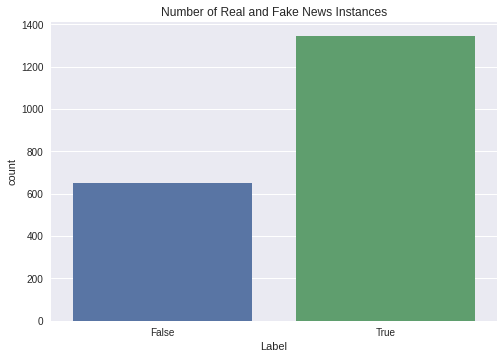

In [ ]:
data.info()
sns.countplot(data.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.Label.value_counts()

https://static01.nyt.com/images/2020/03/12/science/26VIRUS-EXPLAINER-update1/26VIRUS-EXPLAINER-update1-facebookJumbo.jpg
0


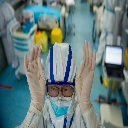

(128, 128, 3)
https://media.npr.org/include/images/facebook-default-wide.jpg?s=1400


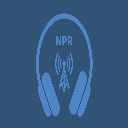

(128, 128, 3)
https://cdn.vox-cdn.com/thumbor/a9_Oz7cvSBKyalibjq3yKtypMqc=/0x153:2130x1268/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/19581722/VRG_ILLO_1777_AK_vaccine.0.jpg


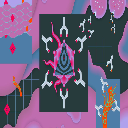

(128, 128, 3)
https://cdn.vox-cdn.com/thumbor/t2gt1SmEni4McrANA0ptgYRMJVg=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/19933222/acastro_200428_1777_coronavirus_0001.0.jpg


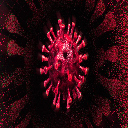

(128, 128, 3)
https://cdn.vox-cdn.com/thumbor/XAsdhCTLqw5uzjUQDbx_uF1VRuw=/0x128:1024x664/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/19651205/AP20027551280119.jpg


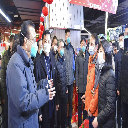

(128, 128, 3)


In [ ]:
CATEGORIES = ['True', 'False']
LENDIR=len(CATEGORIES)

IMG_SIZE = 128
#############################################################      Reading Image URL       ########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils
from matplotlib import pyplot as plt

x=0
for i, j in data.iterrows(): 
  link=j["Image"]
  print(link)
  if(x%500==0):
    print(x)
  try:
    img_array = imutils.url_to_image(link)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    cv2_imshow(new_array)
    x=x+1
    print(new_array.shape)
  except Exception as e:  # in the interest in keeping the output clean... 
    #data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
    print('2')
    pass
    #print(i,j)
  if(x==5): 
    break;   #.....show only one

IMG_SIZE = 128


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)    # Randomly shuffling the dataframe rows
data.reset_index(drop = True, inplace = True) 

In [ ]:
#################################################################    Lables Encoding    #######################################################
labelencoder = LabelEncoder()
#for i,j in data.iterrows():
  #j['type'] = labelencoder.fit_transform(j['type'])
Y = data.Label
Y = labelencoder.fit_transform(Y)

In [ ]:
print(len(Y))
print(Y[:5])

1996
[1 0 0 0 1]


In [ ]:
##############################################################    Reading and Preprocessing Images       ###########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils

training_data_img = []

IMG_SIZE = 128

def create_training_data():
 
  x=0
  for i, j in data.iterrows(): 
    
    link=j['Image']
    #print(link)
    if(x%500==0):
      print(x)

    try:
      #img_array=io.imread(link);
      img_array = imutils.url_to_image(link)
      
      new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))

      x=x+1
      training_data_img.append([new_array,Y[i]])
      #print('1')
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['Image'] == link ].index, inplace = True)
      print('2')
      pass
      #print(i,j) 
 
create_training_data()
 
print(len(training_data_img))

0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1000
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1728


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2368
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1750 non-null   bool  
 1   Text    1750 non-null   object
 2   Title   1750 non-null   object
 3   Image   1750 non-null   object
dtypes: bool(1), object(3)
memory usage: 56.4+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


True     1057
False     693
Name: Label, dtype: int64

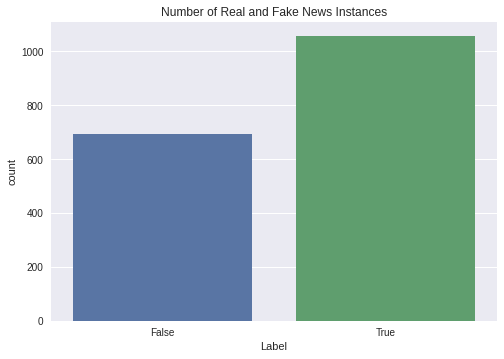

In [ ]:
data.info()
sns.countplot(data.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.Label.value_counts()

In [ ]:
print(type(training_data_img))
print(np.array(training_data_img).shape)
print(len(data))
#print(training_data_img[0])
print(len(training_data_img[0][0]))
print(len(training_data_img[0][0][0]))

<class 'list'>
(1750, 2)
1750
128
128


In [ ]:
from pickle import dump, load
# save the scaler
dump(training_data_img, open('training_data_img.pkl', 'wb'))


In [ ]:
# load the scaler
training_data_img = load(open('training_data_img.pkl', 'rb'))

print(len(training_data_img))
print(type(training_data_img))

print(np.array(training_data_img).shape)

print(len(training_data_img[0][0]))
print(len(training_data_img[0][0][0]))

1750
<class 'list'>
(1750, 2)
128
128


In [ ]:
X_img = []
labels = []
IMG_SIZE = 128

for features,label in training_data_img:
    X_img.append(features)
    labels.append(label)

X_img = np.array(X_img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

X_img = X_img/255.0
print(type(X_img))
print((X_img).shape)
print(len(training_data_img))
#print(X_img[0])

############################################################################################      Image Preprocessing done     #########################################################################

<class 'numpy.ndarray'>
(1750, 128, 128, 3)
1750


In [ ]:
train_df = data.Text
print(train_df[0])
train_df = train_df.astype(str)
print(train_df[0])
print(len(data.Text))

The American Trends Panel (ATP), created by Pew Research Center, is a nationally representative panel of randomly selected U.S. adults. Panelists participate via self-administered web surveys. Panelists who do not have internet access at home are provided with a tablet and wireless internet connection. The panel is being managed by Ipsos.Data in this report is drawn from the panel wave conducted April 7 to April 12, 2020. A total of 4,917 panelists responded out of 6,092 who were sampled, for a response rate of 81%. This does not include one panelist who was removed from the data due to extremely high rates of refusal or straightlining. The cumulative response rate accounting for nonresponse to the recruitment surveys and attrition is 4.4%. The break-off rate among panelists who logged on to the survey and completed at least one item is 1.7%. The margin of sampling error for the full sample of 4,917 respondents is plus or minus 2.1 percentage points.This study featured a stratified ran

In [ ]:
#############################################################################################      Reading and preprocessing Text       ##################################################################################
# import warnings
# warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from gensim.models import Word2Vec                                   #For Word2Vec

X_text = data.Text

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_text = X_text.astype(str)

########################################
## process texts in datasets
########################################
print('Processing text dataset')
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from string import punctuation, ascii_lowercase
import regex as re
from tqdm import tqdm

# replace urls
re_url = re.compile(r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\
                    .([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*",
                    re.MULTILINE|re.UNICODE)
# replace ips
re_ip = re.compile("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")

# setup tokenizer
tokenizer = WordPunctTokenizer()

vocab = Counter()

def text_to_wordlist(text, lower=False):
    # replace URLs
    text = re_url.sub("URL", text)
    
    # replace IPs
    text = re_ip.sub("IPADDRESS", text)
    
    # Tokenize
    text = tokenizer.tokenize(text)
    
    # optional: lower case
    if lower:
        text = [t.lower() for t in text]
    
    # Return a list of words
    vocab.update(text)
    return text

def process_comments(list_sentences, lower=False):
    comments = []
    for text in tqdm(list_sentences):
        txt = text_to_wordlist(text, lower=lower)
        comments.append(txt)
    return comments

                
comments_text = process_comments(X_text, lower=True)

print(comments_text[0])

 33%|███▎      | 586/1750 [00:00<00:00, 5857.69it/s]

Processing text dataset


100%|██████████| 1750/1750 [00:00<00:00, 5396.61it/s]

['the', 'american', 'trends', 'panel', '(', 'atp', '),', 'created', 'by', 'pew', 'research', 'center', ',', 'is', 'a', 'nationally', 'representative', 'panel', 'of', 'randomly', 'selected', 'u', '.', 's', '.', 'adults', '.', 'panelists', 'participate', 'via', 'self', '-', 'administered', 'web', 'surveys', '.', 'panelists', 'who', 'do', 'not', 'have', 'internet', 'access', 'at', 'home', 'are', 'provided', 'with', 'a', 'tablet', 'and', 'wireless', 'internet', 'connection', '.', 'the', 'panel', 'is', 'being', 'managed', 'by', 'ipsos', '.', 'data', 'in', 'this', 'report', 'is', 'drawn', 'from', 'the', 'panel', 'wave', 'conducted', 'april', '7', 'to', 'april', '12', ',', '2020', '.', 'a', 'total', 'of', '4', ',', '917', 'panelists', 'responded', 'out', 'of', '6', ',', '092', 'who', 'were', 'sampled', ',', 'for', 'a', 'response', 'rate', 'of', '81', '%.', 'this', 'does', 'not', 'include', 'one', 'panelist', 'who', 'was', 'removed', 'from', 'the', 'data', 'due', 'to', 'extremely', 'high', 'ra

In [ ]:
################################################     1.  Remove stopwords         ######################################################
nltk.download("stopwords")
stop = set(stopwords.words('english')) 
print(stop)
print(len(X_text))
print(X_text.shape)
print(X_text.head())
print(type(X_text))

X_text_copy = X_text

import re               
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in tqdm(X_text_copy):
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
X_text_copy = temp    

print(X_text_copy[0])


  0%|          | 3/1750 [00:00<01:08, 25.44it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'yourselves', 'about', 'had', "you've", 'as', 'won', 'her', 'to', 'don', 'what', 'its', 'did', 'so', 'are', 'my', 'you', 'i', 'which', 'than', "won't", 'with', 'other', 'up', 'me', 'there', 't', 'isn', 'for', 'is', 'they', 'does', 'on', 'who', 'am', "hadn't", 'hasn', 'where', 'were', 'have', "that'll", 've', "couldn't", "she's", 'those', 'how', 'aren', 'before', 'be', 'm', "don't", 'until', 'by', 'not', "doesn't", 'our', 'and', 'few', 'ours', 'this', 'now', 'we', 'no', 'very', 'in', 'hers', 'from', "you're", 'but', 'such', "wasn't", 'into', 'off', 'mustn', 'an', 'between', "weren't", 'or', 'why', "haven't", 'himself', "mustn't", 'ain', 'doesn', 'was', "you'll", 'through', 'has', 'll', 'can', 'down', 'o', 'these', 'out', 'ma', 'your', 'nor', 'yours', 'same', 'itself', 'weren', 'haven', "shan't", "hasn't", 'themselves', 'any', 'their', 'should', 'more', 'doing', "mightn't", 'ag

100%|██████████| 1750/1750 [00:51<00:00, 34.29it/s]

['american', 'trend', 'panel', 'atp', 'creat', 'pew', 'research', 'center', 'nation', 'repres', 'panel', 'random', 'select', 'u', 'adult', 'panelist', 'particip', 'via', 'self-administ', 'web', 'survey', 'panelist', 'internet', 'access', 'home', 'provid', 'tablet', 'wireless', 'internet', 'connect', 'panel', 'manag', 'ipso', 'data', 'report', 'drawn', 'panel', 'wave', 'conduct', 'april', '7', 'april', '12', '2020', 'total', '4', '917', 'panelist', 'respond', '6', '092', 'sampl', 'respons', 'rate', '81%', 'includ', 'one', 'panelist', 'remov', 'data', 'due', 'extrem', 'high', 'rate', 'refus', 'straightlin', 'cumul', 'respons', 'rate', 'account', 'nonrespons', 'recruit', 'survey', 'attrit', '4', '4%', 'break-off', 'rate', 'among', 'panelist', 'log', 'survey', 'complet', 'least', 'one', 'item', '1', '7%', 'margin', 'sampl', 'error', 'full', 'sampl', '4', '917', 'respond', 'plus', 'minus', '2', '1', 'percentag', 'point', 'studi', 'featur', 'stratifi', 'random', 'sampl', 'atp', 'sampl', 'str

In [ ]:
print(len(comments_text))
print(len(X_text_copy))
print(np.array(comments_text).shape)
print(np.array(X_text_copy).shape)
print(len(comments_text[0]))
print(len(X_text_copy[0]))

print("The vocabulary contains {} unique tokens".format(len(vocab)))

1750
1750
(1750,)
(1750,)
746
382
The vocabulary contains 19661 unique tokens


In [ ]:
############################################     2.   Preparing Word vectors from Word2vec      #################################################
comments_backup = comments_text
comments_text = X_text_copy

import gensim
from gensim.models import Word2Vec
model_text = Word2Vec(comments_backup, size=100, window=5, min_count=5, workers=16, sg=0, negative=5)
word_vectors = model_text.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))         ##

#model_text.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])   #### Example

Number of word vectors: 6088


In [ ]:
print(comments_backup[0])

['the', 'american', 'trends', 'panel', '(', 'atp', '),', 'created', 'by', 'pew', 'research', 'center', ',', 'is', 'a', 'nationally', 'representative', 'panel', 'of', 'randomly', 'selected', 'u', '.', 's', '.', 'adults', '.', 'panelists', 'participate', 'via', 'self', '-', 'administered', 'web', 'surveys', '.', 'panelists', 'who', 'do', 'not', 'have', 'internet', 'access', 'at', 'home', 'are', 'provided', 'with', 'a', 'tablet', 'and', 'wireless', 'internet', 'connection', '.', 'the', 'panel', 'is', 'being', 'managed', 'by', 'ipsos', '.', 'data', 'in', 'this', 'report', 'is', 'drawn', 'from', 'the', 'panel', 'wave', 'conducted', 'april', '7', 'to', 'april', '12', ',', '2020', '.', 'a', 'total', 'of', '4', ',', '917', 'panelists', 'responded', 'out', 'of', '6', ',', '092', 'who', 'were', 'sampled', ',', 'for', 'a', 'response', 'rate', 'of', '81', '%.', 'this', 'does', 'not', 'include', 'one', 'panelist', 'who', 'was', 'removed', 'from', 'the', 'data', 'due', 'to', 'extremely', 'high', 'ra

In [ ]:
############################################      3.   Prepare sequence matrix from vocab         ###############################################
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200

from keras.preprocessing.sequence import pad_sequences

word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}    ##
sequences_text = [[word_index.get(t, 0) for t in comment]
             for comment in comments_backup[:len(X_text)]]  ##

# pad
training_data_text = pad_sequences(sequences_text, maxlen=MAX_SEQUENCE_LENGTH,    
                     padding="pre", truncating="post")     ##
# list_classes = ["real", "fake"]
# y = train_df[list_classes].values
y = np.array(labels)
print('Shape of data tensor:', training_data_text.shape)
print('Shape of label tensor:', y.shape)

# test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
#                           truncating="post")
# print('Shape of test_data tensor:', test_data.shape)

#print(training_data_text[0])

Shape of data tensor: (1750, 200)
Shape of label tensor: (1750,)


In [ ]:
##########################################        4.   Prepare Text embedding vector for embedding layer in Bi-LSTM    #################################
WV_DIM = 100
nb_words_text = min(MAX_NB_WORDS, len(word_vectors.vocab))          ##
# we initialize the matrix with random numbers
wv_matrix_text = (np.random.rand(nb_words_text, WV_DIM) - 0.5) / 5.0     ##
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix_text[i] = embedding_vector
    except:
        pass      

In [ ]:
print(type(training_data_text))
training_data_text = np.array(training_data_text)
print(type(training_data_text))
print((training_data_text).shape)
print(len(training_data_text))
print(training_data_text[0])

######################################################################################       Text Preprocessing ends    #########################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1750, 200)
1750
[   1  294  522  209   17  363  317  872   25  191   95  108    3   11
    7 1860  713  209    4 1803 1397   56    2   13    2   86    2  619
 1130  690  509   10 2318 2026  341    2  619   35  138   28   26  241
  451   41  199   16 1145   18    7 1526    8 3133  241 1184    2    1
  209   11  101 2466   25 2388    2  224    6   20  135   11 1707   23
    1  209 1708  202  139  355    5  139  353    3  118    2    7  505
    4  248    3 1861  619 1318  131    4  425    3 5376   35   59 2652
    3   15    7  263  302    4 1557  625   20  303   28  834   88 3913
   35   42 1668   23    1  224  233    5 2467  245  844    4 3134   32
 3312    2    1 2865  263  302 2027   15 2758    5    1 1291  341    8
 2993   11  248    2  248  625    1 1601   10  519  302   85  619   35
 2994   14    5    1   73    8 1219   41  200   88 2165   11  170    2
  355  625    1  523    4  486  929   15    1  914  531    4  248    3
 1861  607  

In [ ]:
##################################################################################      Reading and preprocessing Title      ##############################################################################
import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

X_title = data.Title

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_title = X_title.astype(str)

comments_title = X_title
###################   1. Tokenisation  #########################
from keras.preprocessing.text import Tokenizer
max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(comments_title)
sequences_2 = tok.texts_to_sequences(comments_title) ###### name training_data_title
training_data_title = sequence.pad_sequences(sequences_2,maxlen=max_len)


print(type(training_data_title))
training_data_title = np.array(training_data_title)
print(type(training_data_title))
print((training_data_title).shape)
print(len(training_data_title))
print(training_data_title[0])

###########################################################################################         Title Preprocessing Ends          ################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1750, 300)
1750
[  1  79   4 682   6 739 804 153  77 207 314   5 472   2  32  74  48 854
   3 653   1 336   2  65 379   3   4 393   1 336  17 970   3 632 128  48
 586   3   5 506 632 128 500   2 438  17   1  45  13 614  13   4 298 484
   1 595  12   1 535  35 220   3 549 277   3   5  61  33   1 539   2  65
  21  48 854   3 653   1 186  10   5 506 178 500   2 438 467 218 420  48
   3   5  77 438  48 830  19 970   6 586   5  52  21   3   5 472   2 379
  48 854   3 653   1 186   6 355   3 653   1 186   6  39  61   1  79  35
 113   9  32 160  17  65   5 472   2 188  48 854   3 653   1 186   6 225
   3 653   1 186   6  39  61   2   1 520 564  28  20 219   1 336 389 584
   6   3 805  61  33   1 104  15  61  35 179   1  45  13 614  13  18  46
   3  14 107  14   2   1 262 971 106 748   8   1 190  23   4   1 517 936
 831 244   1 269 490 186 654  25   8 573   3 698 314 336 201  35 868   4
   5   8  12   5   1 573 754 856   1 535   4   1  39   8   

In [ ]:
print(comments_title[0])

The American Trends Panel (ATP), created by Pew Research Center, is a nationally representative panel of randomly selected U.S. adults. Panelists participate via self-administered web surveys. Panelists who do not have internet access at home are provided with a tablet and wireless internet connection. The panel is being managed by Ipsos.Data in this report is drawn from the panel wave conducted April 7 to April 12, 2020. A total of 4,917 panelists responded out of 6,092 who were sampled, for a response rate of 81%. This does not include one panelist who was removed from the data due to extremely high rates of refusal or straightlining. The cumulative response rate accounting for nonresponse to the recruitment surveys and attrition is 4.4%. The break-off rate among panelists who logged on to the survey and completed at least one item is 1.7%. The margin of sampling error for the full sample of 4,917 respondents is plus or minus 2.1 percentage points.This study featured a stratified ran

In [ ]:
#####################################################################################        Final Train and Test set             ##########################################################################

fin_X = []

total_data = len(training_data_text)
for i in range(len(data)):
  fin_X.append([X_img[i], training_data_text[i], training_data_title[i]])


print(len(fin_X))
print(np.array(fin_X).shape)
print(labels[0:5])
# print(fin_X[0])

1750
(1750, 3)
[1, 1, 1, 0, 1]


In [ ]:
print(type(fin_X))
print(np.array(fin_X[0]).shape)
print(len(fin_X))
print(fin_X[0][0])
print("Hello")
print(fin_X[0][1])
print("Hello")
print(fin_X[0][2])
# print("Hello")
# print(fin_X[0][1])
# print("Hello")
# print(fin_X[0][2])

<class 'list'>
(3,)
1750
[[[1.         1.         1.        ]
  [0.1254902  0.1254902  0.1254902 ]
  [0.1254902  0.1254902  0.1254902 ]
  ...
  [0.1254902  0.1254902  0.1254902 ]
  [0.1254902  0.12941176 0.1254902 ]
  [0.94509804 0.94509804 0.94509804]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         0.99607843 1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.       

In [ ]:
###########################################################################################     Splitting final set to train and test     ###########################################################

from sklearn.model_selection import train_test_split
X_train_val,X_test,Y_train_val,Y_test = train_test_split(fin_X,labels,test_size=0.20)


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)


In [ ]:
print("<-------X_train------>")
print(type(X_train))
print(np.array(X_train).shape)
print(np.array(X_train[0]).shape)
print(np.array(X_train[0][0]).shape)
print(np.array(X_train[0][1]).shape)
print(len(X_train))
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][1]))
print("<-------Y_train------>")
print(type(Y_train))
print(type(Y_train[0]))
print((Y_train[0]))
print("<-------X_test------>")
print(type(X_test[0][0]))
print("<-------Y_test------>")
print(type(Y_test))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(X_train_val))
print(type(X_train))
print(type(X_val))
print(type(X_test))
print("\n")

print(len(X_train_val))
print(len(X_train))
print(len(X_val))
print(len(X_test))

<-------X_train------>
<class 'list'>
(1050, 3)
(3,)
(128, 128, 3)
(200,)
1050
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<-------Y_train------>
<class 'list'>
<class 'numpy.int64'>
1
<-------X_test------>
<class 'numpy.ndarray'>
<-------Y_test------>
<class 'list'>
(1050,)
1050
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


1400
1050
350
350


In [ ]:
#<-------------------------------------------------------------------------------------    IMAGE CLASSIFIER   ------------------------------------------------------------------------------------------------>

In [ ]:
################################################################     Extracting image data from final train and test dataset     #######################################
X_train_img = []
X_test_img = []
X_val_img = []

for i in range(len(X_train)):
  temp1 = X_train[i][0].tolist()
  X_train_img.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][0].tolist()
  X_test_img.append(temp1)

for i in range(len(X_val)):
  temp1 = X_val[i][0].tolist()
  X_val_img.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_img))
X_train_img = np.array(X_train_img)
print(type(X_train_img))
print(np.array(X_train_img).shape)
print(len(X_train_img))
print("<-------X test------->")
print(type(X_test_img))
X_test_img = np.array(X_test_img)
print(type(X_test_img))
print(np.array(X_test_img).shape)
print(len(X_test_img))
print("<-------X val------->")
print(type(X_val_img))
X_val_img = np.array(X_val_img)
print(type(X_val_img))
print(np.array(X_val_img).shape)
print(len(X_val_img))
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(1050, 128, 128, 3)
1050
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 128, 128, 3)
350
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 128, 128, 3)
350
<-------Y train------->
<class 'list'>
<class 'numpy.ndarray'>
(1050,)
1050
<-------Y test------->
<class 'list'>
<class 'numpy.ndarray'>
(350,)
350
<-------Y val------->
<class 'list'>
<class 'numpy.ndarray'>
(350,)
350


# Image

In [ ]:
############################################################################################    VGG16  Model   ###########################################################################
from keras.applications import InceptionV3
from keras.models import Model
import keras

input_shape = (IMG_SIZE, IMG_SIZE, 3)    

vgg = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)


###############  Without fine tuning
vgg_model.trainable = False                
for layer in vgg_model.layers:
    layer.trainable = False


import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])      

87916544/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f31de125c18>,input_9,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f31de125fd0>,conv2d_4,False
2,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f31de133e80>,batch_normalization_9,False
3,<tensorflow.python.keras.layers.core.Activation object at 0x7f31de11b240>,activation_2,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f31de133320>,conv2d_5,False
...,...,...,...
307,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7f31dd6d0438>,mixed9_1,False
308,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7f31dd6c27b8>,concatenate_1,False
309,<tensorflow.python.keras.layers.core.Activation object at 0x7f31dd6617f0>,activation_95,False
310,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7f31dd661710>,mixed10,False


In [ ]:
#############    VGG Feature Extraction    #####################
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_feat_vgg = get_bottleneck_features(vgg_model, X_train_img)
val_feat_vgg = get_bottleneck_features(vgg_model, X_val_img)
test_feat_vgg = get_bottleneck_features(vgg_model, X_test_img)

print('Train Bottleneck Features:', train_feat_vgg.shape, 
      '\nValidation Bottleneck Features:', val_feat_vgg.shape, 
      '\nTest Bottleneck Features:', test_feat_vgg.shape)

11/11 [==============================] - 4s 403ms/step
Train Bottleneck Features: (1050, 8192) 
Validation Bottleneck Features: (350, 8192) 
Test Bottleneck Features: (350, 8192)


In [ ]:
print(vgg_model.output_shape[1])

8192


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
batch_normalization_103 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 4,197,377
Trainable params: 4,196,353
Non-trainable params: 1,024
_________________________________________________________________


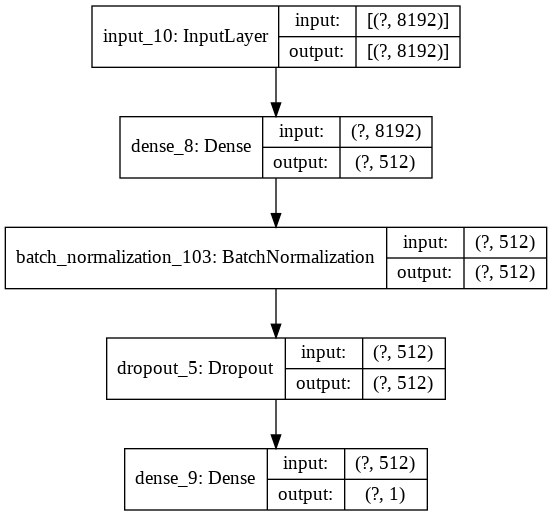

In [ ]:
######################################################################################     Image classifier model architecture   ####################################################################
from tensorflow.python.keras import Sequential
from keras.applications import Xception
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D,  Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

# ###### Part 1 - Initialising the CNN ------>
classifier_img = Sequential()

# ##### VGG without aug --------->
input_layer = vgg_model.output_shape[1]
classifier_img.add(InputLayer(input_shape=(input_layer,)))

# # ######  VGG with Aug --------->
# # classifier_img.add(vgg_model)

# ###### Full Connection ->
classifier_img.add(Dense(units = 512, activation = 'relu',input_dim = input_layer))
classifier_img.add(BatchNormalization())
classifier_img.add(Dropout(0.5))
classifier_img.add(Dense(units = 1, activation = 'sigmoid'))

classifier_img.summary()
plot_model(classifier_img, to_file='classifier_img_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
17/17 [==============================] - 1s 30ms/step - loss: 0.6816 - accuracy: 0.7610 - val_loss: 1.1904 - val_accuracy: 0.8143
Epoch 2/15
17/17 [==============================] - 0s 23ms/step - loss: 0.2781 - accuracy: 0.8800 - val_loss: 0.8399 - val_accuracy: 0.8114
Epoch 3/15
17/17 [==============================] - 0s 23ms/step - loss: 0.2102 - accuracy: 0.9190 - val_loss: 0.6691 - val_accuracy: 0.8486
Epoch 4/15
17/17 [==============================] - 0s 23ms/step - loss: 0.1557 - accuracy: 0.9562 - val_loss: 0.6596 - val_accuracy: 0.8057
Epoch 5/15
17/17 [==============================] - 0s 23ms/step - loss: 0.1188 - accuracy: 0.9600 - val_loss: 0.5369 - val_accuracy: 0.8543
Epoch 6/15
17/17 [==============================] - 0s 23ms/step - loss: 0.1094 - accuracy: 0.9714 - val_loss: 0.6387 - val_accuracy: 0.8114
Epoch 7/15
17/17 [==============================] - 0s 23ms/step - loss: 0.0827 - accuracy: 0.9724 - val_loss: 0.5547 - val_accuracy: 0.8400
Epoch 8/15
17

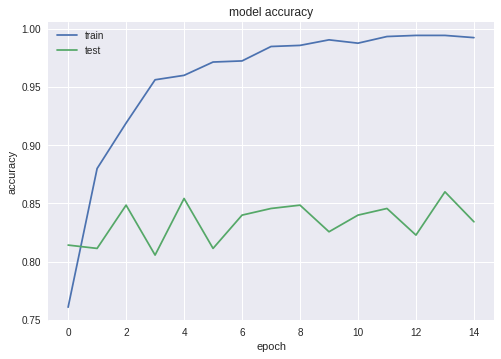

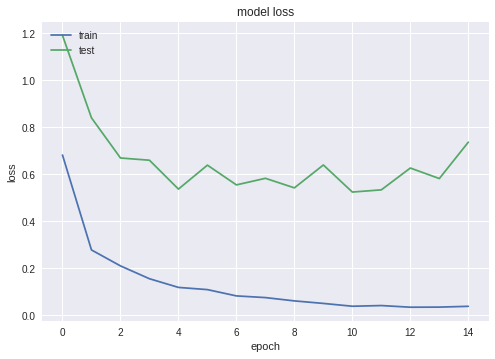

In [ ]:
###########################################################################    Training of VGG16 over Images    #########################################################
classifier_img.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1 = classifier_img.fit(train_feat_vgg,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(val_feat_vgg,Y_val))  ############# testing epochs =2

##################### list all data in history
print(history1.history.keys())
##################### summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###################### summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Y_pred_img = classifier_img.predict_classes(test_feat_vgg)
# Y_pred_prob_img = classifier_text.predict_proba(test_feat_vgg)

cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)

[[ 88  54]
 [  5 203]]


Accuracy: 0.831429


In [ ]:
###################        Save Image Model      ####################
classifier_img.save("classifier_img.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from keras.models import load_model
 
# load model
classifier_img = load_model('classifier_img.h5')
# summarize model.
print(classifier_img.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
batch_normalization_103 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 4,197,377
Trainable params: 4,196,353
Non-trainable params: 1,024
_________________________________________________________________
None


In [ ]:
#################################################   Blue Cnf matrix  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm1, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

[[ 88  54]
 [  5 203]]


Accuracy: 0.831429


              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

roc_auc_score = 0.7978399241603467


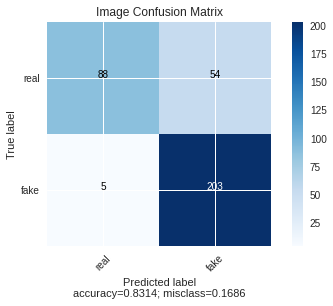

In [ ]:
###################################################   Results of VGG16 over Images    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_img = classifier_img.predict_classes(test_feat_vgg)
Y_pred_prob_img = classifier_img.predict_proba(test_feat_vgg)
cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)
print("\n")

classreport_img = classification_report(Y_test, Y_pred_img)
print(classreport_img)
print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_img, average='macro'))

plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title = "Image Confusion Matrix")

In [ ]:
########################################  Prediction Probabilities of Image  #####################################################
#Y_pred_prob_img = classifier_img.predict(X_test_img)
Y_pred_prob_img = Y_pred_prob_img.round()
print(len(Y_pred_prob_img))
print(type(Y_pred_prob_img))
print(np.array(Y_pred_prob_img).shape)
print(Y_pred_prob_img[0:10])

350
<class 'numpy.ndarray'>
(350, 1)
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


No Skill: ROC AUC=0.500
VGG16: ROC AUC=0.798


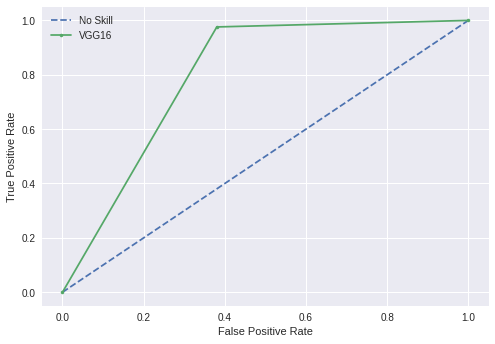

In [ ]:
###################################################   ROC for Images    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_img
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# # retrieve just the probabilities for the positive class
# pos_probs = Y_pred_img[:, 1]
# # plot no skill roc curve
# pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# # calculate roc curve for model
# fpr, tpr, _ = roc_curve(Y_test, pos_probs)
# # plot model roc curve
# pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

# Text

In [ ]:
#<----------------------------------------------------------------------------------------------------    TEXT  CLASSIFIER   --------------------------------------------------------------------------------------------------------->

In [ ]:
#########################################     Extracting text data from final train and test dataset     #######################################
X_train_text = []
X_val_text = []
X_test_text = []

for i in range(len(X_train)):
  temp1 = X_train[i][1].tolist()
  X_train_text.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][1].tolist()
  X_val_text.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][1].tolist()
  X_test_text.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_text))
X_train_text = np.array(X_train_text)
print(type(X_train_text))
print(np.array(X_train_text).shape)
print(len(X_train_text))
print("<-------X test------->")
print(type(X_test_text))
X_test_text = np.array(X_test_text)
print(type(X_test_text))
print(np.array(X_test_text).shape)
print(len(X_test_text))
print("<-------X val------->")
print(type(X_val_text))
X_val_text = np.array(X_val_text)
print(type(X_val_text))
print(np.array(X_val_text).shape)
print(len(X_val_text))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(1050, 200)
1050
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 200)
350
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 200)
350


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1050,)
1050
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(350,)
350
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(350,)
350


In [ ]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
#from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
#from keras.models import Sequential
#from keras.utils import Sequence
#from keras.layers import CuDNNLSTM

In [ ]:
# ####################################################################################     Bi-LSTM model architecture for text     ###################################################################

from keras.layers import Dense, Input, LSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.layers.normalization import BatchNormalization

wv_layer = Embedding(nb_words_text,
                     WV_DIM,
                     mask_zero=False,
                     weights=[wv_matrix_text],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=False)

# Inputs
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = wv_layer(comment_input)

# bilstm
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = LSTM(64, return_sequences=False)(embedded_sequences)
x= Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)


# Output
#x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='sigmoid')(x)

# build the model
classifier_text = Model(inputs=[comment_input], outputs=preds)

classifier_text.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          608800    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

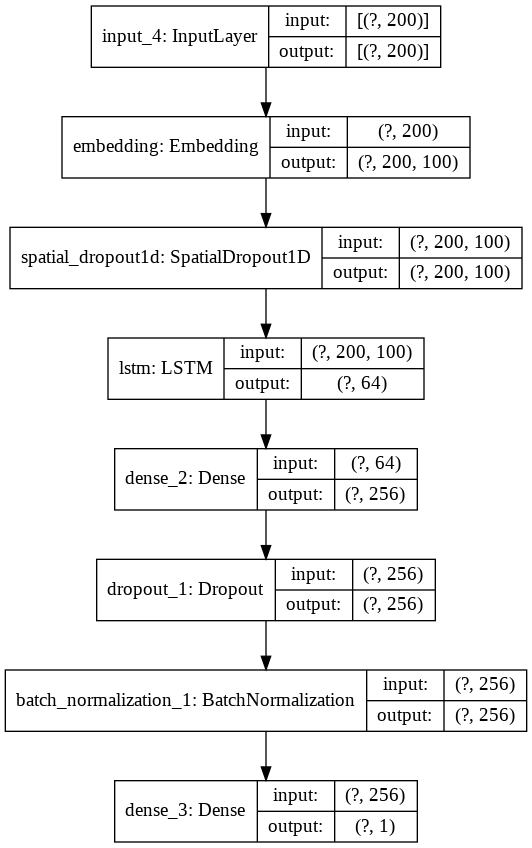

In [ ]:
plot_model(classifier_text, to_file='classifier_text_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
17/17 [==============================] - 3s 163ms/step - loss: 0.7011 - accuracy: 0.6210 - val_loss: 0.6351 - val_accuracy: 0.6543
Epoch 2/15
17/17 [==============================] - 2s 135ms/step - loss: 0.6509 - accuracy: 0.6676 - val_loss: 0.6268 - val_accuracy: 0.6200
Epoch 3/15
17/17 [==============================] - 2s 135ms/step - loss: 0.5808 - accuracy: 0.7086 - val_loss: 0.6135 - val_accuracy: 0.6257
Epoch 4/15
17/17 [==============================] - 2s 135ms/step - loss: 0.5311 - accuracy: 0.7400 - val_loss: 0.5894 - val_accuracy: 0.6457
Epoch 5/15
17/17 [==============================] - 2s 136ms/step - loss: 0.4966 - accuracy: 0.7667 - val_loss: 0.5275 - val_accuracy: 0.7771
Epoch 6/15
17/17 [==============================] - 2s 134ms/step - loss: 0.4498 - accuracy: 0.7981 - val_loss: 0.5238 - val_accuracy: 0.7514
Epoch 7/15
17/17 [==============================] - 2s 134ms/step - loss: 0.4021 - accuracy: 0.8229 - val_loss: 0.4864 - val_accuracy: 0.7686
Epoch 

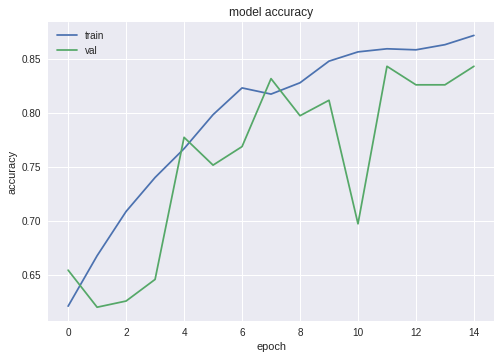

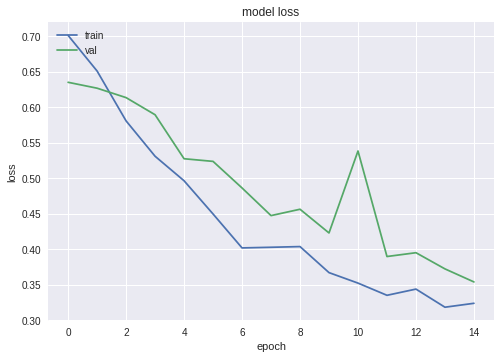

In [ ]:
##################################################################################      Training Bi-LSTM model over text      #################################################################
classifier_text.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_text,Y_test))     ###########  validation on test set
history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(X_val_text,Y_val))                   ###########  validation on a subset of training set 

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
###################        Save Model      ####################
classifier_text.save("classifier_text.h5")
print("Saved model to disk")

Saved model to disk


[[ 52 134]
 [  0 792]]


Accuracy: 0.862986


              precision    recall  f1-score   support

           0       1.00      0.28      0.44       186
           1       0.86      1.00      0.92       792

    accuracy                           0.86       978
   macro avg       0.93      0.64      0.68       978
weighted avg       0.88      0.86      0.83       978

roc_auc_score = 0.6397849462365591


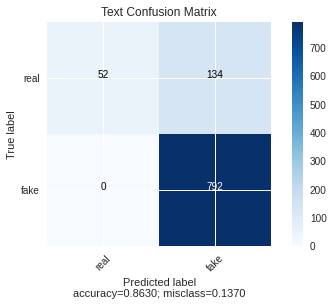

In [ ]:
######################################################   Results of Bi-LSTM over text    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_text = classifier_text.predict(X_test_text)
#Y_pred_prob_text = classifier_text.predict_proba(X_test_text)

cm_text=confusion_matrix(Y_test,Y_pred_text.round())
print(cm_text)

print("\n")
accuracy_text = accuracy_score(Y_test, Y_pred_text.round())
print('Accuracy: %f' % accuracy_text)
print("\n")

classreport_text = classification_report(Y_test, Y_pred_text.round())
print(classreport_text)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_text.round(), average='macro'))
plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")

In [ ]:
##############################################  Prediction Probabilities of Text  #####################################################
Y_pred_prob_text = classifier_text.predict(X_test_text)
print(len(Y_pred_prob_text))
print(type(Y_pred_prob_text))
print(np.array(Y_pred_prob_text).shape)
print(Y_pred_prob_text[0:5])

978
<class 'numpy.ndarray'>
(978, 1)
[[0.88470703]
 [0.8825321 ]
 [0.8845979 ]
 [0.8986272 ]
 [0.8924978 ]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.640


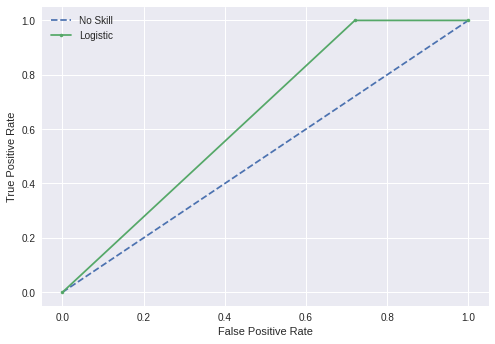

In [ ]:
###################################################   ROC for Text    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_text.round()
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(Y_pred_text[0])

[0.88470703]


# Title

In [ ]:
#<------------------------------------------------------------------------------------------------------    TITLE  CLASSIFIER  -------------------------------------------------------------------------------------------------------->

In [ ]:
#######################################################################   Extracting Title from final dataset  ###############################################################
X_train_title = []
X_val_title = []
X_test_title = []

for i in range(len(X_train)):
  temp1 = X_train[i][2].tolist()
  X_train_title.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][2].tolist()
  X_val_title.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][2].tolist()
  X_test_title.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_title))
X_train_title = np.array(X_train_title)
print(type(X_train_title))
print(np.array(X_train_title).shape)
print(len(X_train_title))
print("<-------X test------->")
print(type(X_test_title))
X_test_title = np.array(X_test_title)
print(type(X_test_title))
print(np.array(X_test_title).shape)
print(len(X_test_title))
print("<-------X val------->")
print(type(X_val_title))
X_val_title = np.array(X_val_title)
print(type(X_val_title))
print(np.array(X_val_title).shape)
print(len(X_val_title))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(1050, 300)
1050
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 300)
350
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(350, 300)
350


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1050,)
1050
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(350,)
350
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(350,)
350


In [ ]:
##############################################################     Bi-LSTM model for title     ###############################################

from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_title = Sequential()
classifier_title.add(Embedding(max_words,50,input_length=max_len))
classifier_title.add(LSTM(64))
classifier_title.add(Dense(256,name='FC1'))
classifier_title.add(BatchNormalization())
classifier_title.add(Activation('relu'))
classifier_title.add(Dropout(0.5))
classifier_title.add(Dense(1,name='out_layer'))
#classifier_title.add(BatchNormalization())
classifier_title.add(Activation('sigmoid'))

classifier_title.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

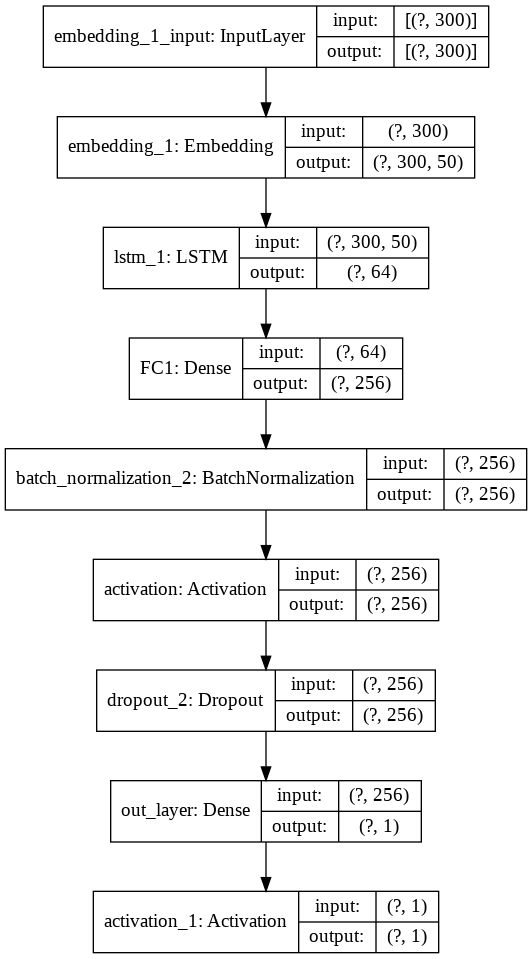

In [ ]:
plot_model(classifier_title, to_file='classifier_title_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
17/17 [==============================] - 4s 226ms/step - loss: 0.5504 - accuracy: 0.7162 - val_loss: 0.6624 - val_accuracy: 0.7171
Epoch 2/15
17/17 [==============================] - 3s 201ms/step - loss: 0.3756 - accuracy: 0.8476 - val_loss: 0.6466 - val_accuracy: 0.8171
Epoch 3/15
17/17 [==============================] - 3s 203ms/step - loss: 0.2586 - accuracy: 0.8971 - val_loss: 0.6359 - val_accuracy: 0.8029
Epoch 4/15
17/17 [==============================] - 3s 200ms/step - loss: 0.2053 - accuracy: 0.9152 - val_loss: 0.6074 - val_accuracy: 0.8143
Epoch 5/15
17/17 [==============================] - 3s 199ms/step - loss: 0.1603 - accuracy: 0.9305 - val_loss: 0.5837 - val_accuracy: 0.8314
Epoch 6/15
17/17 [==============================] - 4s 209ms/step - loss: 0.1240 - accuracy: 0.9505 - val_loss: 0.5999 - val_accuracy: 0.7343
Epoch 7/15
17/17 [==============================] - 4s 222ms/step - loss: 0.1132 - accuracy: 0.9571 - val_loss: 0.5869 - val_accuracy: 0.6914
Epoch 

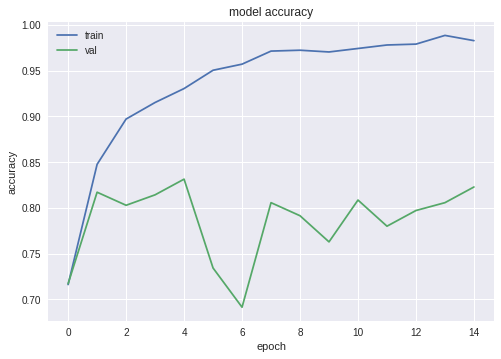

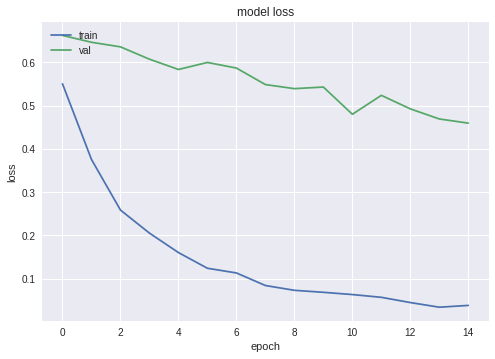

In [ ]:
#################################################################################      Training Bi-LSTM model over title     ########################################################################
classifier_title.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_title,Y_test))     ###########  validation on test set
history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(X_val_title,Y_val))        ###########  validation on a subset of training set 

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
###################        Save Model      ####################
classifier_title.save("classifier_title.h5")
print("Saved model to disk")

Saved model to disk


[[ 89  53]
 [ 17 191]]


Accuracy: 0.800000


              precision    recall  f1-score   support

           0       0.84      0.63      0.72       142
           1       0.78      0.92      0.85       208

    accuracy                           0.80       350
   macro avg       0.81      0.77      0.78       350
weighted avg       0.81      0.80      0.79       350

roc_auc_score = 0.7725148970747564


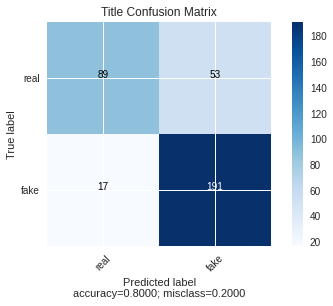

In [ ]:
######################################################   Results of Bi-LSTM over title    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_title = classifier_title.predict_classes(X_test_title)
Y_pred_prob_title = classifier_title.predict_proba(X_test_title)

cm_title=confusion_matrix(Y_test,Y_pred_title)
print(cm_title)

print("\n")
accuracy_title = accuracy_score(Y_test, Y_pred_title)
print('Accuracy: %f' % accuracy_title)
print("\n")

classreport_title = classification_report(Y_test, Y_pred_title)
print(classreport_title)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_title, average='macro'))

plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title = "Title Confusion Matrix")

In [ ]:
##################################################  Prediction Probabilities of Title  #####################################################
print(len(Y_pred_prob_title))
print(type(Y_pred_prob_title))
print(np.array(Y_pred_prob_title).shape)
print(Y_pred_prob_title[0:5])

350
<class 'numpy.ndarray'>
(350, 1)
[[0.41615352]
 [0.10695767]
 [0.88714874]
 [0.26658535]
 [0.876465  ]]


No Skill: ROC AUC=0.500
Bi_LSTM for title: ROC AUC=0.773


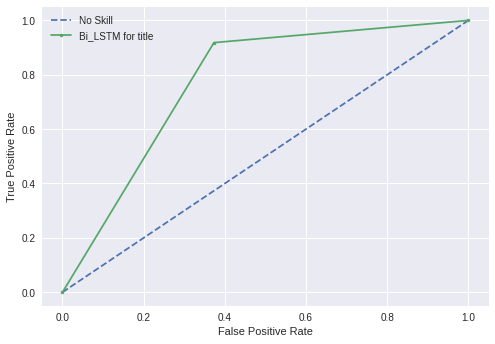

In [ ]:
###################################################   ROC for Title    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_title
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bi_LSTM for title: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Bi_LSTM for title')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#**Average**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i] + Y_pred_prob_title[i])/2
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291


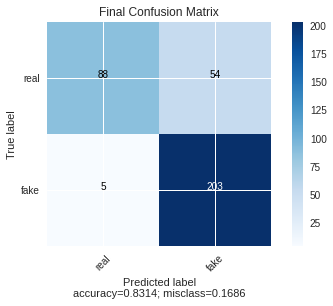

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


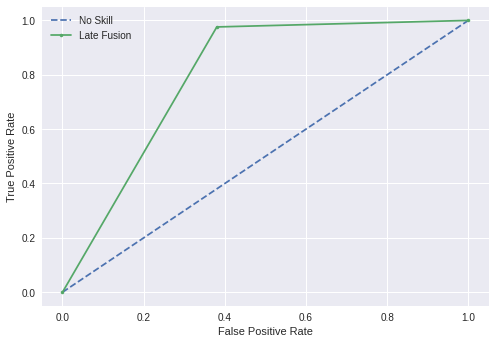

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

#**Sum**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i] + Y_pred_prob_title[i])
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[ 63  79]
 [  2 206]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.61       142
           1       0.72      0.99      0.84       208

    accuracy                           0.77       350
   macro avg       0.85      0.72      0.72       350
weighted avg       0.82      0.77      0.74       350

Accuracy: 0.768571
roc_auc_score = 0.7170232936078007
f1_score = 0.7221977246670783


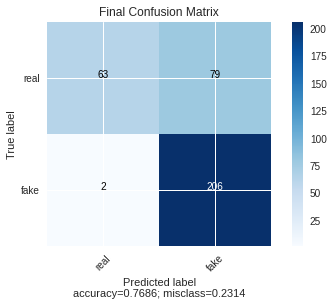

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.717


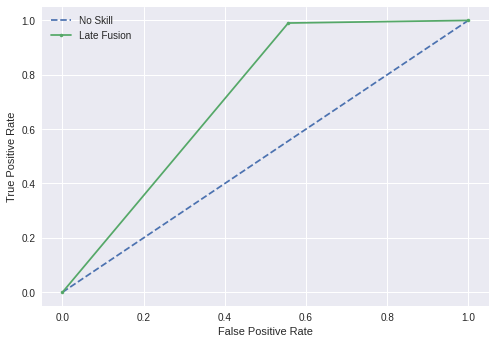

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

#**Max**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = max(Y_pred_prob_img[i], Y_pred_prob_title[i])
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[ 63  79]
 [  2 206]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.61       142
           1       0.72      0.99      0.84       208

    accuracy                           0.77       350
   macro avg       0.85      0.72      0.72       350
weighted avg       0.82      0.77      0.74       350

Accuracy: 0.768571
roc_auc_score = 0.7170232936078007
f1_score = 0.7221977246670783


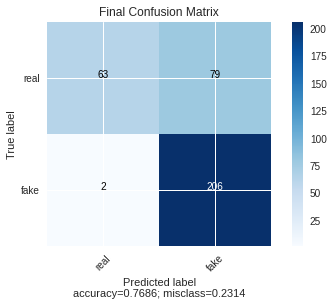

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.717


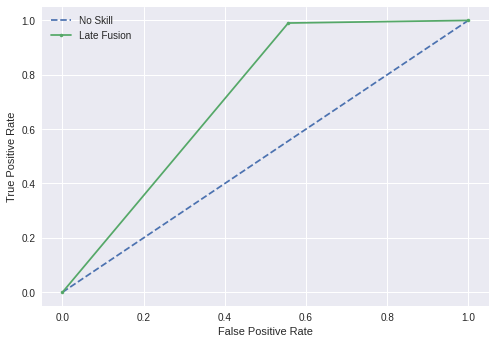

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion(w1,w3):
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_title[i]*w3)/(w1+w3)
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

#**Other Combinations**

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.6
Title_weight =  0.4


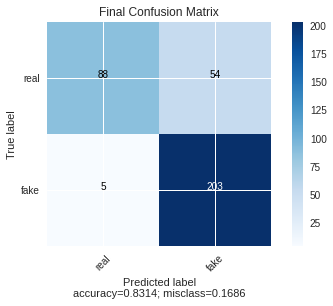

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


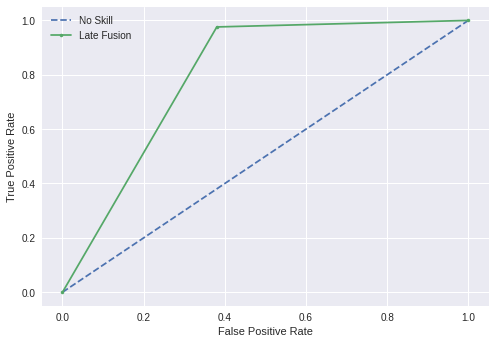

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.6,0.4)
final_roc(Final_prediction)

[[ 93  49]
 [  6 202]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       142
           1       0.80      0.97      0.88       208

    accuracy                           0.84       350
   macro avg       0.87      0.81      0.83       350
weighted avg       0.86      0.84      0.84       350

Accuracy: 0.842857
roc_auc_score = 0.8130417118093175
f1_score = 0.8259792621520715
Image_weight =  0.4
Title_weight =  0.6


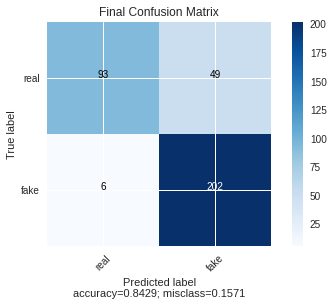

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.813


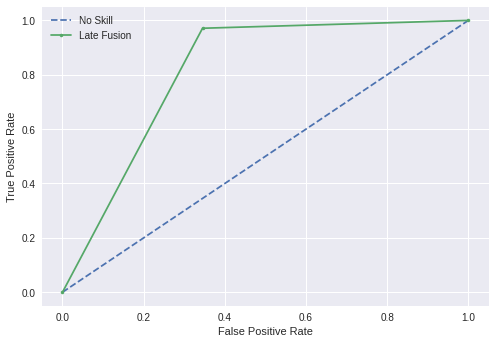

In [ ]:
# ##################################################    (b) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.4,0.6)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.5
Title_weight =  0.5


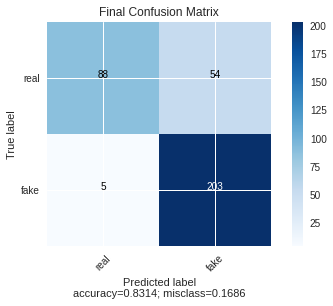

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


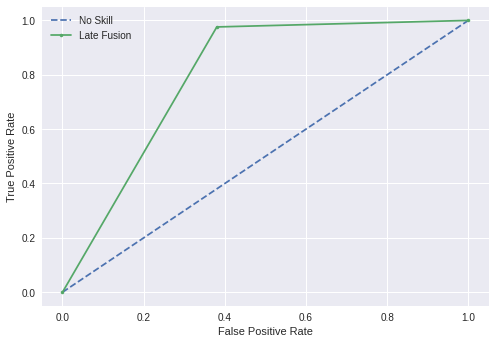

In [ ]:
# ##################################################    (c) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.5,0.5)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.7
Title_weight =  0.3


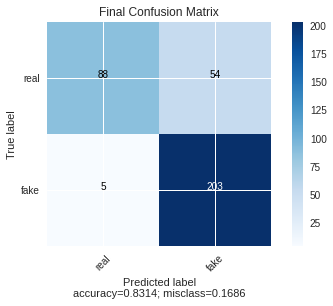

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


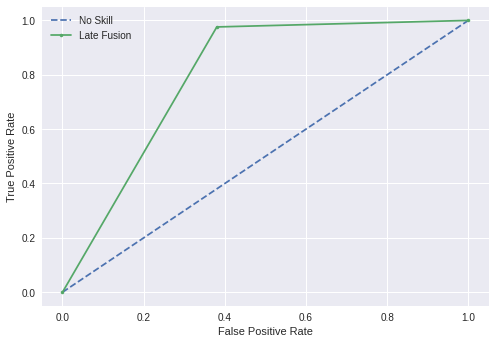

In [ ]:
# ##################################################    (d) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.7,0.3)
final_roc(Final_prediction)

[[ 87  55]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.79      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.828571
roc_auc_score = 0.7943187973997834
f1_score = 0.8074171893914384
Image_weight =  0.3
Title_weight =  0.7


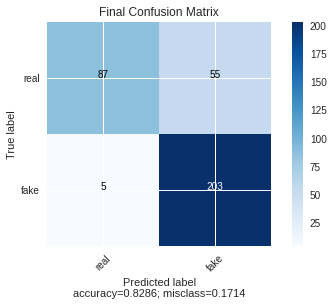

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.794


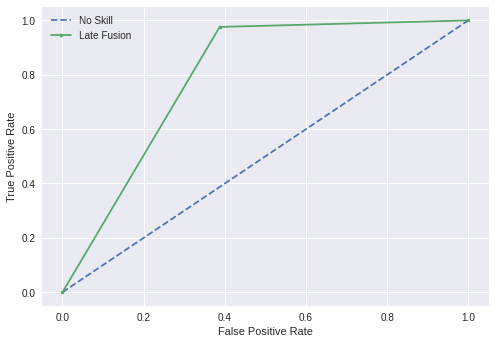

In [ ]:
# ##################################################    (e) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.3,0.7)
final_roc(Final_prediction)

[[ 93  49]
 [  4 204]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       142
           1       0.81      0.98      0.89       208

    accuracy                           0.85       350
   macro avg       0.88      0.82      0.83       350
weighted avg       0.87      0.85      0.84       350

Accuracy: 0.848571
roc_auc_score = 0.8178494041170098
f1_score = 0.8316376078926112
Image_weight =  0.35
Title_weight =  0.65


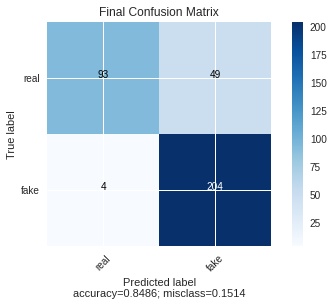

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.818


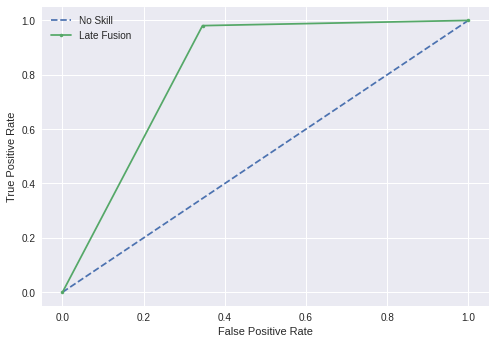

In [ ]:
# ##################################################    (f) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.35,0.65)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.65
Title_weight =  0.35


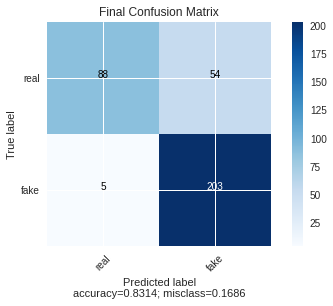

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


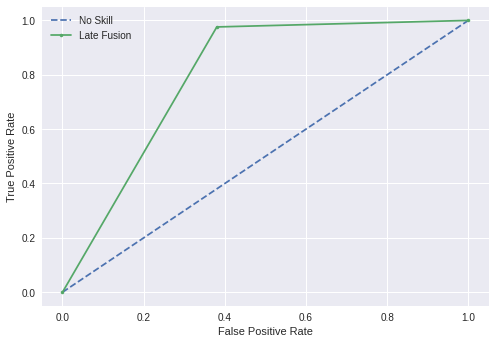

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.65,0.35)
final_roc(Final_prediction)

[[ 87  55]
 [  9 199]]
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       142
           1       0.78      0.96      0.86       208

    accuracy                           0.82       350
   macro avg       0.84      0.78      0.80       350
weighted avg       0.83      0.82      0.81       350

Accuracy: 0.817143
roc_auc_score = 0.7847034127843988
f1_score = 0.7962821492233259
Image_weight =  0.25
Title_weight =  0.75


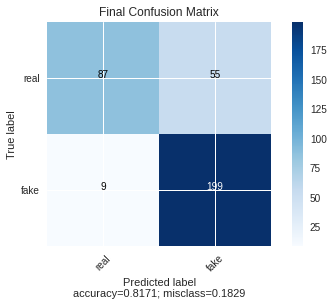

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.785


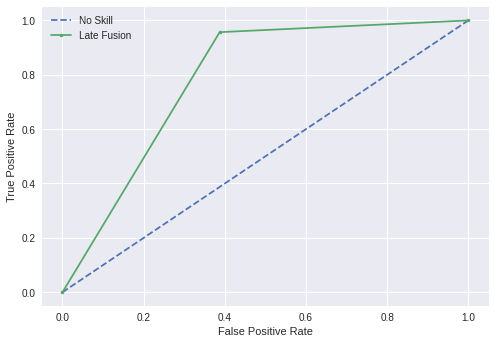

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.25,0.75)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.75
Title_weight =  0.25


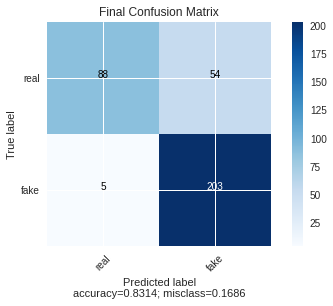

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


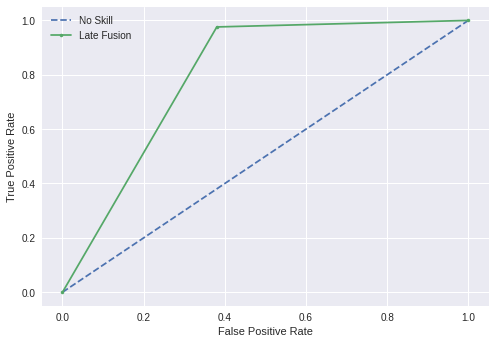

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.75,0.25)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.55
Title_weight =  0.45


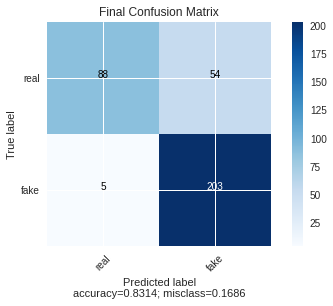

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


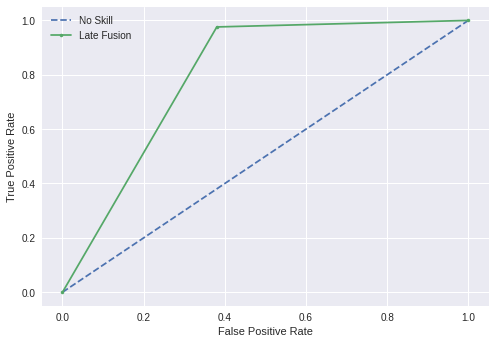

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.55,0.45)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.8
Title_weight =  0.2


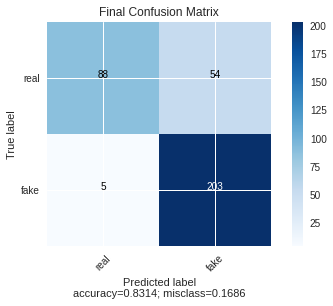

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


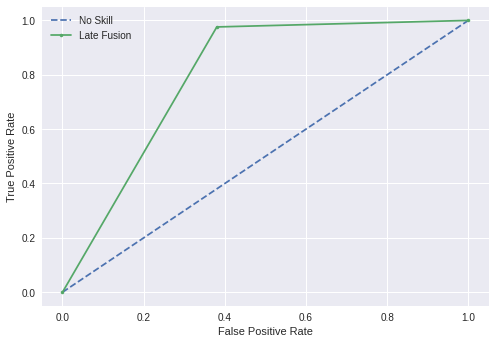

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.8, 0.2)
final_roc(Final_prediction)

[[ 89  53]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       142
           1       0.79      0.94      0.86       208

    accuracy                           0.81       350
   macro avg       0.83      0.78      0.80       350
weighted avg       0.83      0.81      0.81       350

Accuracy: 0.814286
roc_auc_score = 0.784534127843987
f1_score = 0.7951391702911275
Image_weight =  0.2
Title_weight =  0.8


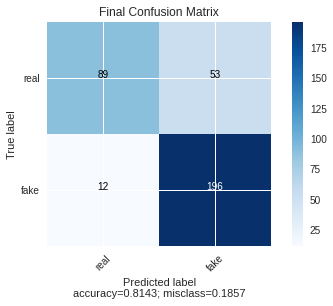

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.785


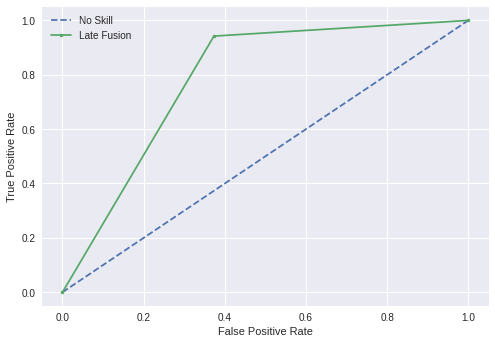

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.2,0.8)
final_roc(Final_prediction)

[[ 88  54]
 [ 14 194]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       142
           1       0.78      0.93      0.85       208

    accuracy                           0.81       350
   macro avg       0.82      0.78      0.79       350
weighted avg       0.81      0.81      0.80       350

Accuracy: 0.805714
roc_auc_score = 0.7762053087757314
f1_score = 0.7860943341961462
Image_weight =  0.15
Title_weight =  0.85


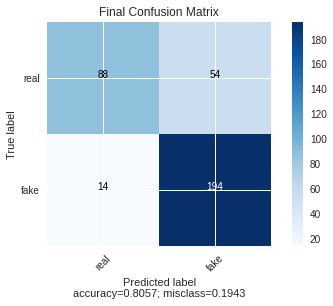

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.776


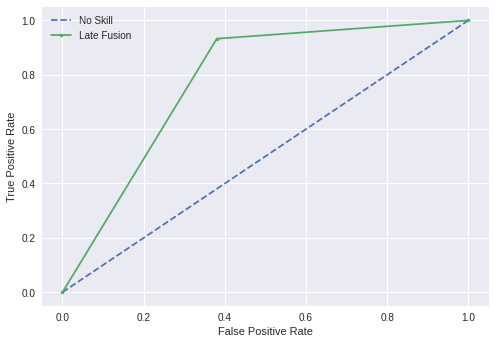

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.15,0.85)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.85
Title_weight =  0.15


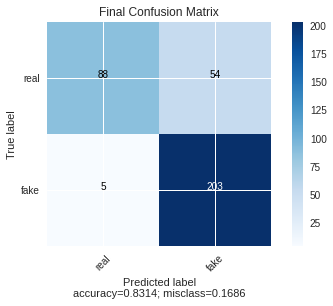

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


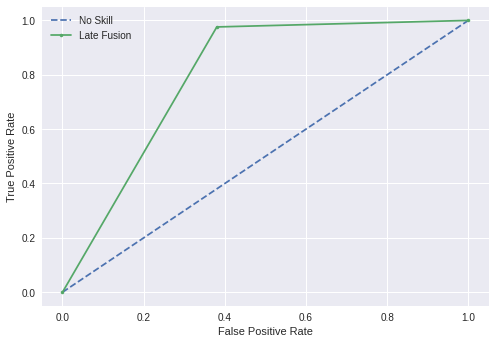

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.85,0.15)
final_roc(Final_prediction)

[[ 90  52]
 [ 16 192]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.73       142
           1       0.79      0.92      0.85       208

    accuracy                           0.81       350
   macro avg       0.82      0.78      0.79       350
weighted avg       0.81      0.81      0.80       350

Accuracy: 0.805714
roc_auc_score = 0.7784398699891658
f1_score = 0.7876819868683986
Image_weight =  0.1
Title_weight =  0.9


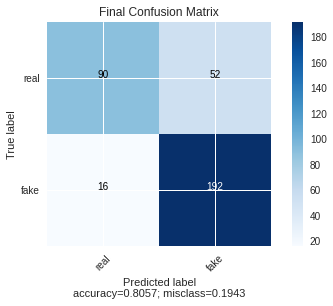

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.778


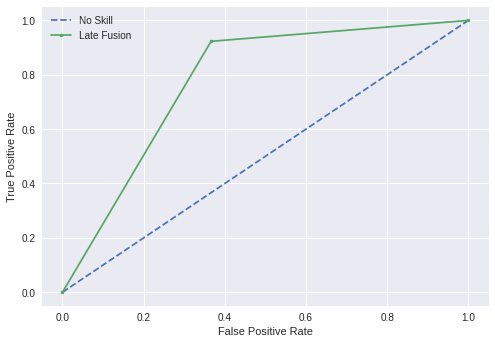

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.1,0.9)
final_roc(Final_prediction)

[[ 88  54]
 [  5 203]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       142
           1       0.79      0.98      0.87       208

    accuracy                           0.83       350
   macro avg       0.87      0.80      0.81       350
weighted avg       0.85      0.83      0.82       350

Accuracy: 0.831429
roc_auc_score = 0.7978399241603467
f1_score = 0.8110272248913291
Image_weight =  0.9
Title_weight =  0.1


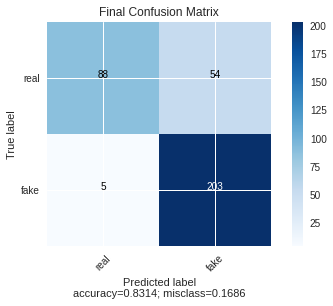

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


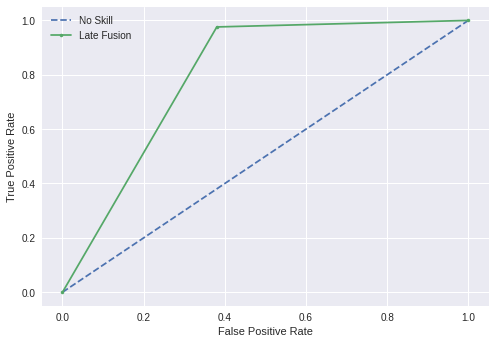

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.9,0.1)
final_roc(Final_prediction)

# gt

[[111  75]
 [  3 789]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       186
           1       0.91      1.00      0.95       792

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.920245
roc_auc_score = 0.7964931573802541
f1_score = 0.8464492753623187
Image_weight =  0.3
Text_weight =  0.35
Title_weight =  0.35


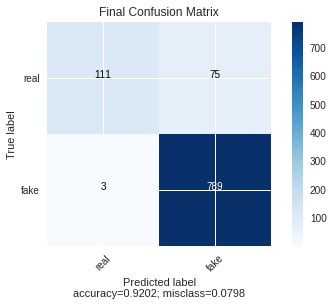

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.796


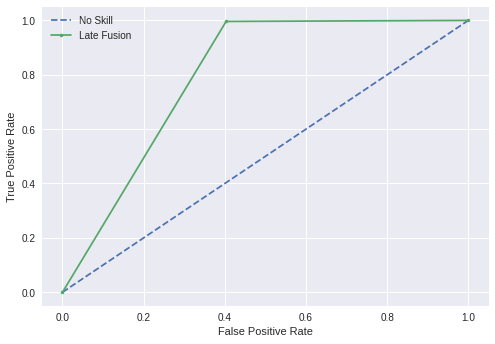

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.3,0.35,0.35)
final_roc(Final_prediction)

[[112  74]
 [  5 787]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       186
           1       0.91      0.99      0.95       792

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.919223
roc_auc_score = 0.7979187031606387
f1_score = 0.8457410169329094
Image_weight =  0.35
Text_weight =  0.3
Title_weight =  0.35


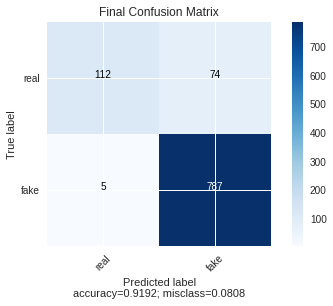

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.798


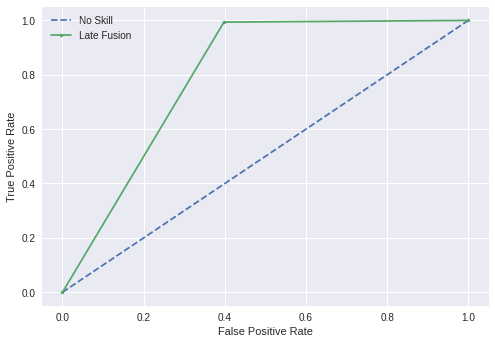

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.35,0.3,0.35)
final_roc(Final_prediction)

[[111  75]
 [  5 787]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       186
           1       0.91      0.99      0.95       792

    accuracy                           0.92       978
   macro avg       0.93      0.80      0.84       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.918200
roc_auc_score = 0.795230531117628
f1_score = 0.8433658720180659
Image_weight =  0.35
Text_weight =  0.35
Title_weight =  0.3


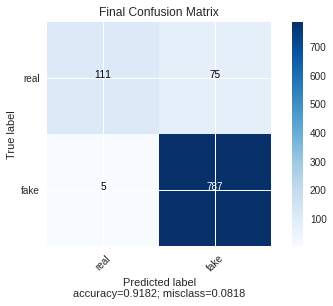

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.795


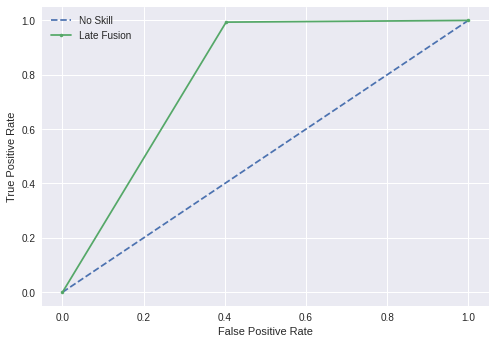

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.35,0.35,0.3)
final_roc(Final_prediction)

[[106  80]
 [  3 789]]
              precision    recall  f1-score   support

           0       0.97      0.57      0.72       186
           1       0.91      1.00      0.95       792

    accuracy                           0.92       978
   macro avg       0.94      0.78      0.83       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.915133
roc_auc_score = 0.7830522971652003
f1_score = 0.8343370850722966
Image_weight =  0.2
Text_weight =  0.4
Title_weight =  0.4


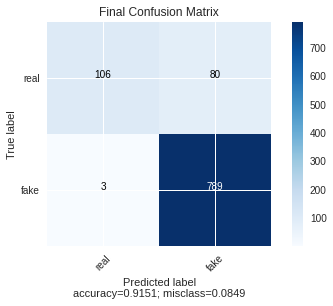

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.783


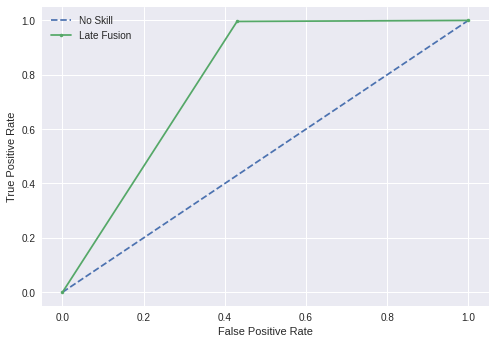

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.2,0.4,0.4)
final_roc(Final_prediction)

[[114  72]
 [  5 787]]
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       186
           1       0.92      0.99      0.95       792

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.921268
roc_auc_score = 0.8032950472466602
f1_score = 0.8504512913187239
Image_weight =  0.4
Text_weight =  0.2
Title_weight =  0.4


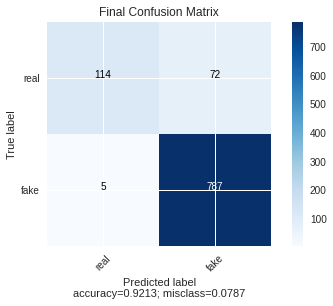

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.803


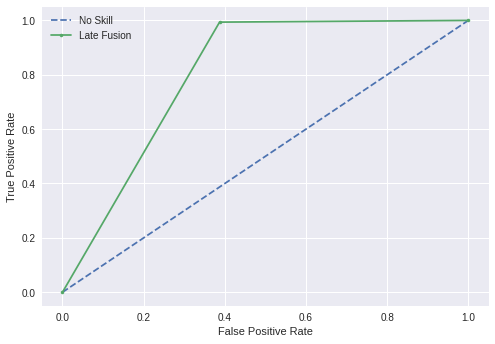

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.4,0.2,0.4)
final_roc(Final_prediction)

[[114  72]
 [  5 787]]
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       186
           1       0.92      0.99      0.95       792

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

Accuracy: 0.921268
roc_auc_score = 0.8032950472466602
f1_score = 0.8504512913187239
Image_weight =  0.4
Text_weight =  0.4
Title_weight =  0.2


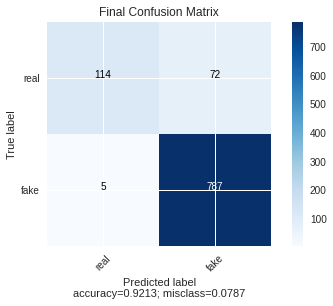

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.803


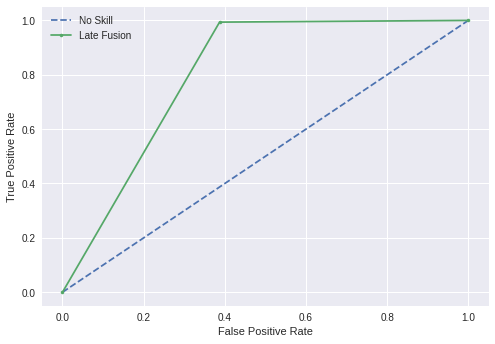

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.4,0.4,0.2)
final_roc(Final_prediction)